# Ordinal Regression

Bibliografy: Fabian Pedregosa-Izquierdo. Feature extraction and supervised learning on fMRI: from practice to theory. PhD thesis.

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mord as mr
from sklearn import linear_model, metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report,mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
import time
import datetime
from scipy import stats

In [38]:
df = pd.read_csv(r'C:/Users/aldoi/Desktop/Università di Pisa/Big Data/GooglePlayProg/CSV/data_cleaned.csv')
df.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver,Main_Genres,Secondary_Genres,Is_Family,Is_Game,Compatibility,RTR,Both_Stores
0,🔥 FOOTBALL WALLPAPERS 4K | FULL HD BACKGROUNDS 😍,4.7,11661,4.0,"(1000000, 5000000]",0.00,Everyone,07-2018,1.1.3.2,4.0.3 and up,Entertainment,None,0,0,Medium,0.002914,0
1,📏 SMART RULER ↔️ CM/INCH MEASURING FOR HOMEWORK!,4.0,19,3.2,"(10000, 50000]",0.00,Everyone,10-2017,1.0,4.2 and up,Tools,None,0,0,Medium,0.000473,0
2,"💘 WHATSLOV: SMILEYS OF LOVE, STICKERS AND GIF",4.6,22098,18.0,"(1000000, 5000000]",0.00,Everyone,07-2018,4.2.4,4.0.3 and up,Social,None,0,0,Medium,0.005523,0
3,💎 I'M RICH,3.8,718,26.0,"(10000, 50000]",399.99,Everyone,03-2018,1.0.0,4.4 and up,Lifestyle,None,0,0,Medium,0.017948,0
4,감성학원 BL 첫사랑,4.4,190,34.0,"(10000, 50000]",0.00,Everyone,11-2017,3.2.1,3.0 and up,Comics,None,0,0,Medium,0.004748,0


Last Updated trasforming

In [40]:
df['YearUpdated'], df['MonthUpdated'] = pd.to_datetime(df['Last Updated']).dt.year, pd.to_datetime(df['Last Updated']).dt.month

Categorical LabelEconding

In [41]:
categorical_attrs = ['Installs', 'Content Rating', 'Current Ver', 'Android Ver', 'Main_Genres','Secondary_Genres', 'Compatibility']
numerical_attrs = ['Reviews', 'Size', 'Price']
df[categorical_attrs] = df[categorical_attrs].apply(LabelEncoder().fit_transform)
df.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver,Main_Genres,Secondary_Genres,Is_Family,Is_Game,Compatibility,RTR,Both_Stores,YearUpdated,MonthUpdated
0,🔥 FOOTBALL WALLPAPERS 4K | FULL HD BACKGROUNDS 😍,4.7,11661,4.0,6,0.00,1,07-2018,278,14,17,5,0,0,2,0.002914,0,2018,7
1,📏 SMART RULER ↔️ CM/INCH MEASURING FOR HOMEWORK!,4.0,19,3.2,4,0.00,1,10-2017,104,17,42,5,0,0,2,0.000473,0,2017,10
2,"💘 WHATSLOV: SMILEYS OF LOVE, STICKERS AND GIF",4.6,22098,18.0,6,0.00,1,07-2018,1853,14,39,5,0,0,2,0.005523,0,2018,7
3,💎 I'M RICH,3.8,718,26.0,4,399.99,1,03-2018,108,19,24,5,0,0,2,0.017948,0,2018,3
4,감성학원 BL 첫사랑,4.4,190,34.0,4,0.00,1,11-2017,1551,9,12,5,0,0,2,0.004748,0,2017,11


Drop Apps and Last Updated attributes

In [42]:
columns=['App','Last Updated']
df.drop(columns, inplace=True, axis=1)

Dataset spliting

In [43]:
class_name='Rating'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

In [44]:
from sklearn.metrics import make_scorer
mse=make_scorer(mean_squared_error,greater_is_better=False)

GridSearch on LAD model

In [45]:
param_grid = {"epsilon":[0.0,0.1,1.0,0.001],"tol": [0.0001,0.001,0.01,0.00001],
              "loss": ['l2','l1','epsilon_insensitive'],
              "max_iter":[10000],"C":[1,5,10]
             }

# run grid search
grid = GridSearchCV(mr.LAD(random_state=42), param_grid, n_jobs=-1, cv = 5, scoring = mse)
grid.fit(X_train, y_train)

C:\Users\aldoi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

C:\Users\aldoi\Anaconda3\lib\site-packages\sklearn\svm\classes.py:408: DeprecationWarning:

loss='l2' has been deprecated in favor of loss='squared_epsilon_insensitive' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0

C:\Users\aldoi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LAD(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=42, tol=0.0001,
                           verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.0, 0.1, 1.0, 0.001],
                         'loss': ['l2', 'l1', 'epsilon_insensitive'],
                         'max_iter': [10000],
                         'tol': [0.0001, 0.001, 0.01, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

Best estimator LAD model

In [46]:
LAD=grid.best_estimator_
LAD

LAD(C=1, dual=True, epsilon=0.0, fit_intercept=True, intercept_scaling=1.0,
    loss='squared_epsilon_insensitive', max_iter=10000, random_state=42,
    tol=0.0001, verbose=0)

In [47]:
LAD.fit(X_train, y_train)

C:\Users\aldoi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LAD(C=1, dual=True, epsilon=0.0, fit_intercept=True, intercept_scaling=1.0,
    loss='squared_epsilon_insensitive', max_iter=10000, random_state=42,
    tol=0.0001, verbose=0)

Evaluating of training performance

In [48]:
y_pred =LAD.predict(X_train)
print('Mean Absolute Error of LAD %s' %
      metrics.mean_absolute_error(y_train, y_pred))
print ('Mean Squared Error %s' %
      mean_squared_error(y_train,y_pred))
Pearson, p_value = stats.pearsonr(y_train, y_pred)
KStest, p_value = stats.ks_2samp(y_train,y_pred) 
print('Pearson:', round(Pearson,3))
print('KS test:', round(KStest,3))

Mean Absolute Error of LAD 0.7378395965511632
Mean Squared Error 1.371633317065235
Pearson: -0.139
KS test: 0.704


Evaluating of test performance

In [49]:
#Least Absolute Deviation
y_pred =LAD.predict(X_test)
print('Mean Absolute Error of LAD %s' %
      metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error %s' %
      mean_squared_error(y_test,y_pred))
Pearson, p_value = stats.pearsonr(y_test, y_pred)
KStest, p_value = stats.ks_2samp(y_test,y_pred) 
print('Pearson:', round(Pearson,3))
print('KS test:', round(KStest,3))

Mean Absolute Error of LAD 0.7591707317073171
Mean Squared Error 1.3911463414634149
Pearson: -0.143
KS test: 0.704


Plotting of prediction LAD model

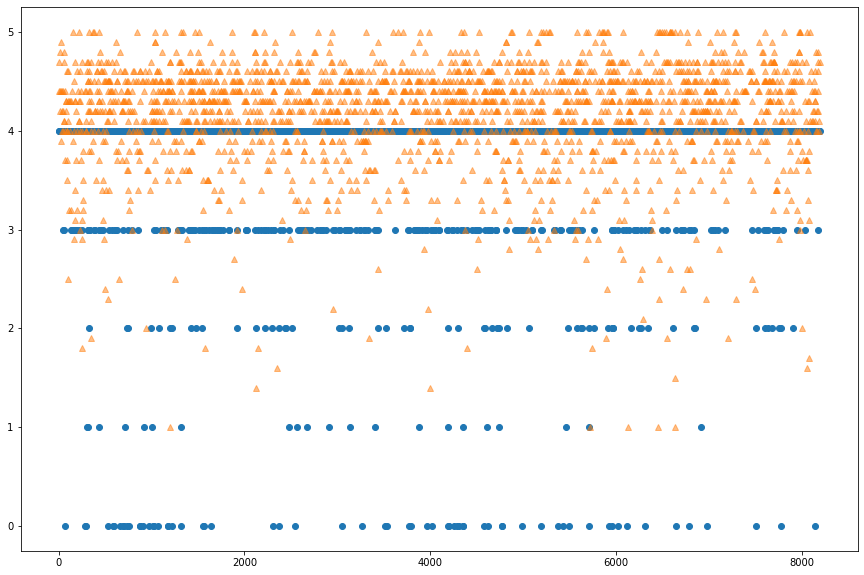

In [50]:
pred_df = pd.DataFrame(data = {"Predicted": np.around(y_pred, decimals=1), "Actual": y_test})
plt.figure(figsize=(15,10))

plt.plot(pred_df["Predicted"][:], "o")
plt.plot(pred_df['Actual'][:], "^", alpha=0.50)
plt.show()

GridSearch on OrdinalRidge model

In [52]:
param_grid = {"alpha":[1,0.1,0.01,0.001,0.0001,0],"tol": [0.0001,0.001,0.01,0.00001],
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga','auto'],
              "max_iter":[10000]
             }

# run grid search
grid = GridSearchCV(mr.OrdinalRidge(random_state=42), param_grid, n_jobs=-1, cv = 5, scoring = mse)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True,
                                    max_iter=None, normalize=False,
                                    random_state=42, solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'max_iter': [10000],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga', 'auto'],
                         'tol': [0.0001, 0.001, 0.01, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

Best estimator of OR model

In [53]:
OR=grid.best_estimator_
OR

OrdinalRidge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
             normalize=False, random_state=42, solver='svd', tol=0.0001)

Evaluating of training performance

In [54]:
y_pred =OR.predict(X_train)
print('Mean Absolute Error of OrdinalRidge %s' %
      metrics.mean_absolute_error(y_train, y_pred))
print ('Mean Squared Error %s' %
      mean_squared_error(y_train,y_pred))
Pearson, p_value = stats.pearsonr(y_train, y_pred)
KStest, p_value = stats.ks_2samp(y_train,y_pred) 
print('Pearson:', round(Pearson,3))
print('KS test:', round(KStest,3))

Mean Absolute Error of OrdinalRidge 0.43352855051244504
Mean Squared Error 0.30919635594598993
Pearson: 0.114
KS test: 0.689


Evaluating of test performance

In [55]:
y_pred =OR.predict(X_test)
print('Mean Absolute Error of OrdinalRidge %s' %
      metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error %s' %
      mean_squared_error(y_test,y_pred))
Pearson, p_value = stats.pearsonr(y_test, y_pred)
KStest, p_value = stats.ks_2samp(y_test,y_pred) 
print('Pearson:', round(Pearson,3))
print('KS test:', round(KStest,3))

Mean Absolute Error of OrdinalRidge 0.4437560975609756
Mean Squared Error 0.3268536585365853
Pearson: 0.095
KS test: 0.69


Plotting prediction OR model

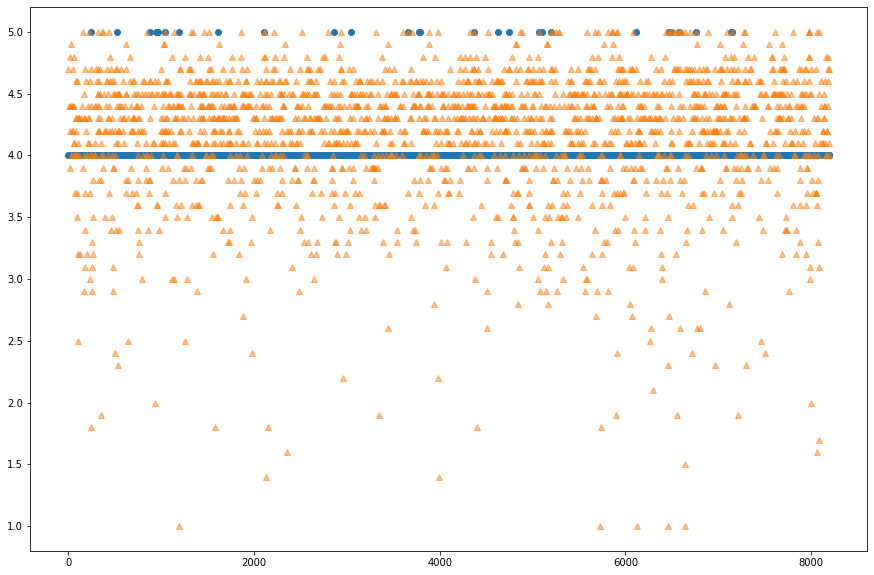

In [56]:
pred_df = pd.DataFrame(data = {"Predicted": np.around(y_pred, decimals=1), "Actual": y_test})
plt.figure(figsize=(15,10))

plt.plot(pred_df["Predicted"][:], "o")
plt.plot(pred_df['Actual'][:], "^", alpha=0.50)
plt.show()